
Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model
1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'D:\Data science\Projects\End2End_ML\notebook\data.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.isna().mean()*100

gender                         0.0
race_ethnicity                 0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
df=df.rename(columns={"race_ethinicity":"race","parental_level_of_education":"parent_edu","test_preparation_course":"test_prep_course","reading_score":"read_score","writing_score":"write_score"})

In [13]:
pip install ydata-profiling

In [14]:
import pandas as pd
from ydata_profiling import ProfileReport


# Create a profile report
profile = ProfileReport(df, title="Data Profiling Report", explorative=True)

# Save to HTML
profile.to_file("report.html")

# Or display directly in Jupyter Notebook
# profile.to_notebook_iframe()


Export report to file: 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]


In [15]:
# Adding col fot total score
df['total score'] = df['math_score'] + df['read_score'] + df['write_score']
df['average'] = df['total score']/3
df.head()


,gender,race_ethnicity,parent_edu,lunch,test_prep_course,math_score,read_score,write_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
read_full=df[df['read_score'] == 100]['read_score'].count()
write_full=df[df['write_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()
read_full,write_full,math_full

(17, 14, 7)

In [24]:
read_less=df[df['read_score'] <=20]['read_score'].count()
write_less=df[df['write_score']<=20]['average'].count()
math_less=df[df['math_score']<=20]['average'].count()
read_less,write_less,math_less

(1, 3, 4)

<Axes: xlabel='average', ylabel='Count'>

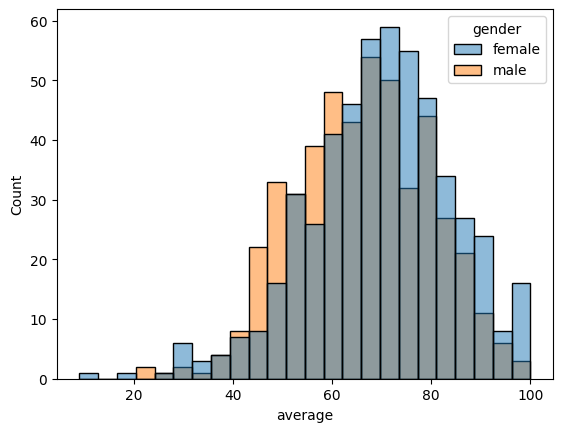

In [26]:
sns.histplot(data=df,x='average',hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

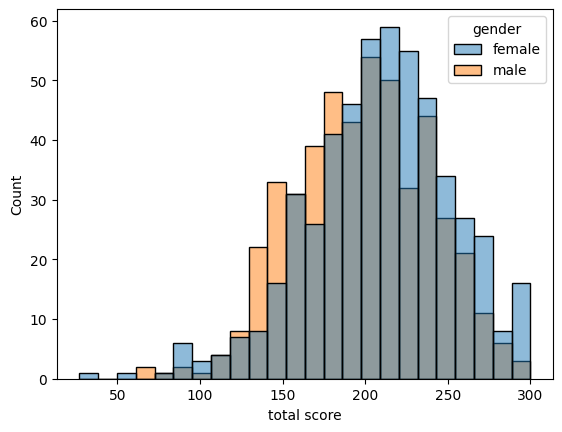

In [28]:
sns.histplot(data=df,x='total score',hue='gender')